<a href="https://colab.research.google.com/github/ArchitTheCoder/C119/blob/main/C119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()


Saving C119.csv to C119.csv


In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [4]:
columnNames = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
df = pd.read_csv("C119.csv", names=columnNames).iloc[1:]
print(df.head(10))


   pregnant glucose  bp skin insulin   bmi pedigree age label
1         6     148  72   35       0  33.6    0.627  50     1
2         1      85  66   29       0  26.6    0.351  31     0
3         8     183  64    0       0  23.3    0.672  32     1
4         1      89  66   23      94  28.1    0.167  21     0
5         0     137  40   35     168  43.1    2.288  33     1
6         5     116  74    0       0  25.6    0.201  30     0
7         3      78  50   32      88    31    0.248  26     1
8        10     115   0    0       0  35.3    0.134  29     0
9         2     197  70   45     543  30.5    0.158  53     1
10        8     125  96    0       0     0    0.232  54     1


In [5]:
features = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]
X = df[features]
y = df.label

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred))

Accuracy is 0.7239583333333334


In [15]:
data = StringIO()
export_graphviz(clf, out_file= data, filled= True, rounded= True, special_characters= True, feature_names= features, class_names= ["0", "1"])
print(data.getvalue())

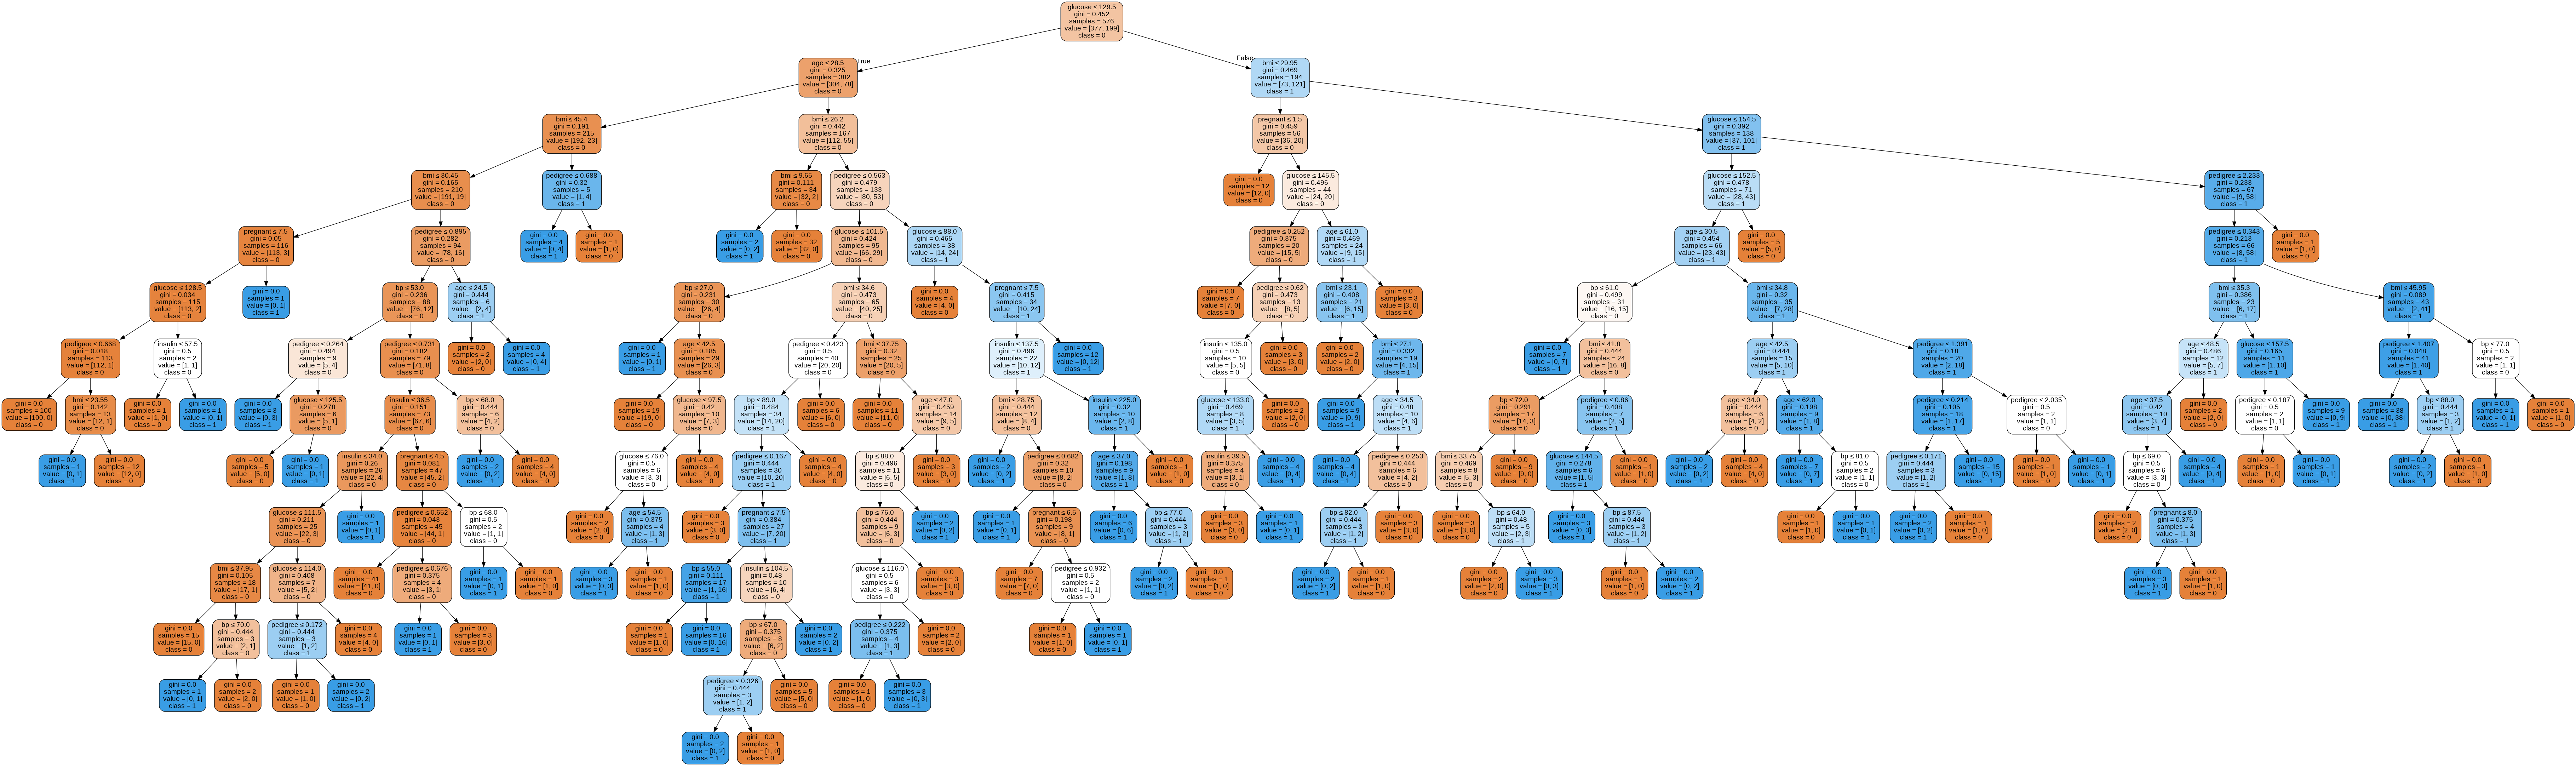

In [19]:
graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("Diabetes.png")
Image(graph.create_png())

In [26]:
clf = DecisionTreeClassifier(max_depth= 1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred))

Accuracy is 0.734375


In [29]:
data = StringIO()
export_graphviz(clf, out_file= data, filled= True, rounded= True, special_characters= True, feature_names= features, class_names= ["0", "1"])
print(data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.452<br/>samples = 576<br/>value = [377, 199]<br/>class = 0>, fillcolor="#f3c4a2"] ;
1 [label=<gini = 0.325<br/>samples = 382<br/>value = [304, 78]<br/>class = 0>, fillcolor="#eca16c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.469<br/>samples = 194<br/>value = [73, 121]<br/>class = 1>, fillcolor="#b0d8f5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


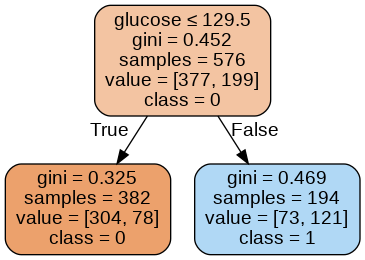

In [28]:
graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("Diabetes.png")
Image(graph.create_png())